# Classification des partis politiques

Ce notebook a pour objectif de classifier des partis politiques en utilisant des modèles d'apprentissage automatique. Les étapes suivantes seront suivies :


1. **Chargement des Données** :
- Nous chargeons les données vectorisées à partir des fichiers CSV et les préparons pour l'entraînement et le test.

2. **Entraînement et Évaluation du Modèle** :
- Nous définissons une fonction `classification_data` qui permet d'entraîner et d'évaluer un modèle de classification.
( Nous utilisons cette fonction pour entraîner différents modèles et évaluer leurs performances.


In [24]:
import pandas as pd

In [25]:
# On charge nos données
df_train = pd.read_csv("./data_csv/train/partis_train_convertis.csv")
df_test = pd.read_csv("./data_csv/test/partis_test_convertis.csv")

In [32]:
# On regarde si on a bien les mêmes résultats que dans le notebook vectorizer.ipynb
print(f" 📚 Le corpus test converti 📚 : \n ID {df_test}")
print(f"📚 Le corpus train converti 📚 : \n ID {df_train}")

 📚 Le corpus test converti 📚 : 
 ID        Classe
0           4
1           2
2           5
3           2
4           5
...       ...
12910       5
12911       5
12912       4
12913       2
12914       3

[12915 rows x 1 columns]
📚 Le corpus train converti 📚 : 
 ID        Classe
0           1
1           5
2           1
3           3
4           3
...       ...
19365       3
19366       5
19367       5
19368       5
19369       5

[19370 rows x 1 columns]


In [34]:
import numpy as np

In [35]:

# On crée nos données d'entraînement et de test en les initialisant aléatoirement
X_train = np.random.rand(len(df_train), 5)  # On a 5 caractéristiques
y_train = df_train['Classe'].values
X_test = np.random.rand(len(df_test), 5)    # On a 5 caractéristiques
y_test = df_test['Classe'].values


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# On importe les libraires de visualisation
import seaborn as sns
import matplotlib.pyplot as plt


In [42]:
# On crée une fonction pour afficher les résultats de la classification
def classification_data(model, X_train, y_train, X_test, y_test, model_name):
    """
    Cette fonction permet d'entrainer et évaluer un modèle donné.
    
    Paramètres :
    - model: Le modèle d'apprentissage à entrainer.
    - X_train: Les données d'entraînement.
    - y_train: Les labels d'entraînement.
    - X_test: Les données de test.
    - y_test: Les labels de test.
    - model_name: Le nom de l'algorithme de classification.
    """
    
    print(" 🥁 Chargement ... 🥁")
    
    # Entraîne le modèle
    model.fit(X_train, y_train)
    
    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)
    
    # Résultats de la classification
    print(f"🎄 Résultat : {model_name} 🎄")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

    # Matrice de confusion
    print("🎨 Matrice de Confusion 🎨")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(15, 10))
    sns.heatmap(cm, fmt="d", annot=True, cmap="flare")
    plt.title("Matrice de Confusion")
    plt.xlabel("Prédiction")
    plt.ylabel("Réalité")
    plt.tight_layout()
    plt.show()

## Test des algorithmes de classification

1) **Arbre de décision**

In [43]:
from sklearn.tree import DecisionTreeClassifier

 🥁 Chargement ... 🥁
🎄 Résultat : Arbre de Décision 🎄
              precision    recall  f1-score   support

           1       0.12      0.12      0.12      1585
           2       0.14      0.15      0.14      1793
           3       0.27      0.26      0.27      3627
           4       0.10      0.10      0.10      1339
           5       0.36      0.35      0.35      4571

    accuracy                           0.25     12915
   macro avg       0.20      0.20      0.20     12915
weighted avg       0.25      0.25      0.25     12915

Accuracy: 0.2450638792102207
🎨 Matrice de Confusion 🎨


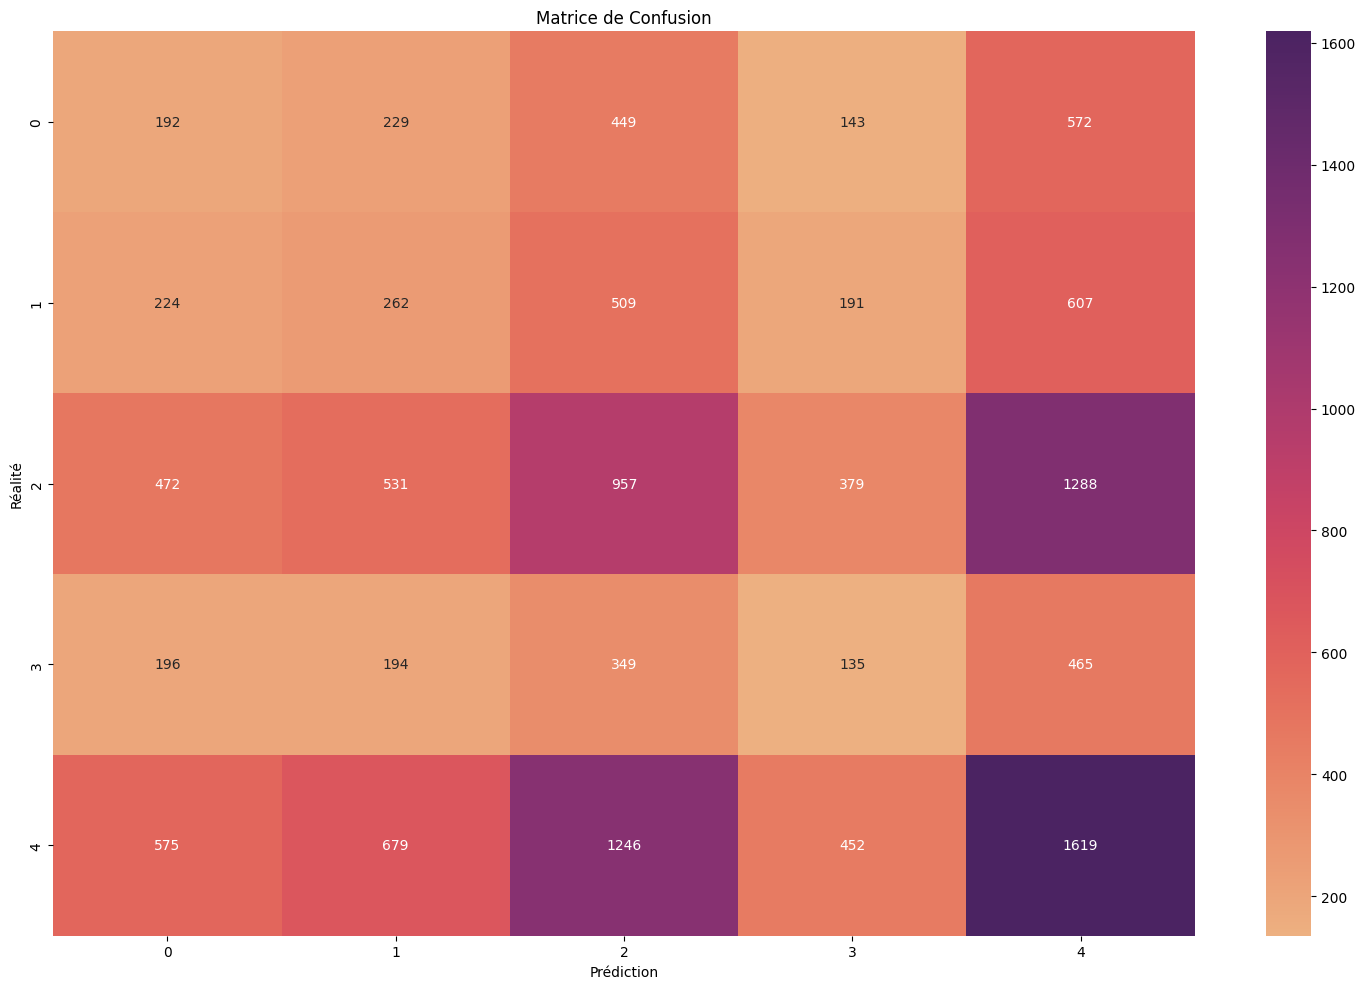

In [44]:
# Création du modèle --> 0.24 d'accuracy - 1 seconde
tree_model = DecisionTreeClassifier(random_state=42)

# On appelle notre fonction de classification
classification_data(tree_model, X_train, y_train, X_test, y_test, "Arbre de Décision")

2) **Random Forest**

In [49]:
from sklearn.ensemble import RandomForestClassifier

 🥁 Chargement ... 🥁
🎄 Résultat : Random Forest 🎄
              precision    recall  f1-score   support

           1       0.14      0.02      0.04      1585
           2       0.13      0.03      0.04      1793
           3       0.28      0.31      0.30      3627
           4       0.09      0.01      0.01      1339
           5       0.36      0.64      0.46      4571

    accuracy                           0.32     12915
   macro avg       0.20      0.20      0.17     12915
weighted avg       0.25      0.32      0.26     12915

Accuracy: 0.3210220673635308
🎨 Matrice de Confusion 🎨


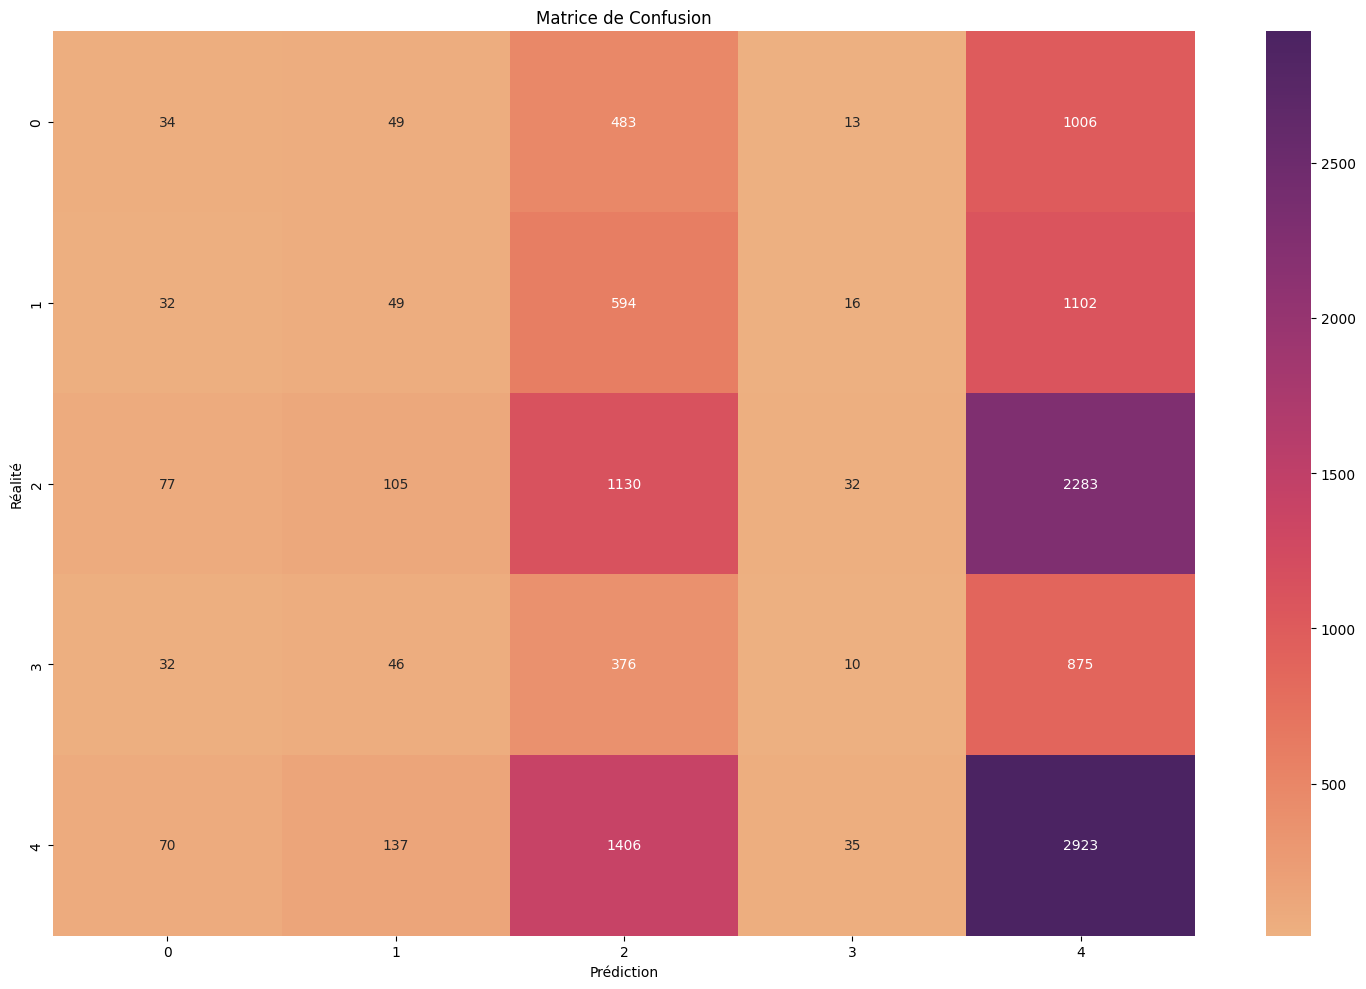

In [48]:
# Création du modèle --> 0.32 d'accuracy - 19 secondes

# Nous avons essayé avec l'hyperparamètre n_estimators=100 car il améliore généralement les performances du modèle, mais malheureusement pas ici
random_forest = RandomForestClassifier(random_state=42)

# On appelle notre fonction de classification
classification_data(random_forest, X_train, y_train, X_test, y_test, "Random Forest")

3) **Naïve Bayes**

In [50]:
from sklearn.naive_bayes import MultinomialNB

 🥁 Chargement ... 🥁
🎄 Résultat : Naïve Bayes 🎄
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1585
           2       0.00      0.00      0.00      1793
           3       0.00      0.00      0.00      3627
           4       0.00      0.00      0.00      1339
           5       0.35      1.00      0.52      4571

    accuracy                           0.35     12915
   macro avg       0.07      0.20      0.10     12915
weighted avg       0.13      0.35      0.19     12915

Accuracy: 0.35392953929539295
🎨 Matrice de Confusion 🎨


/home/patricia/Desktop/universite/master_2/apprentissage_automatique/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/patricia/Desktop/universite/master_2/apprentissage_automatique/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/patricia/Desktop/universite/master_2/apprentissage_automatique/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predi

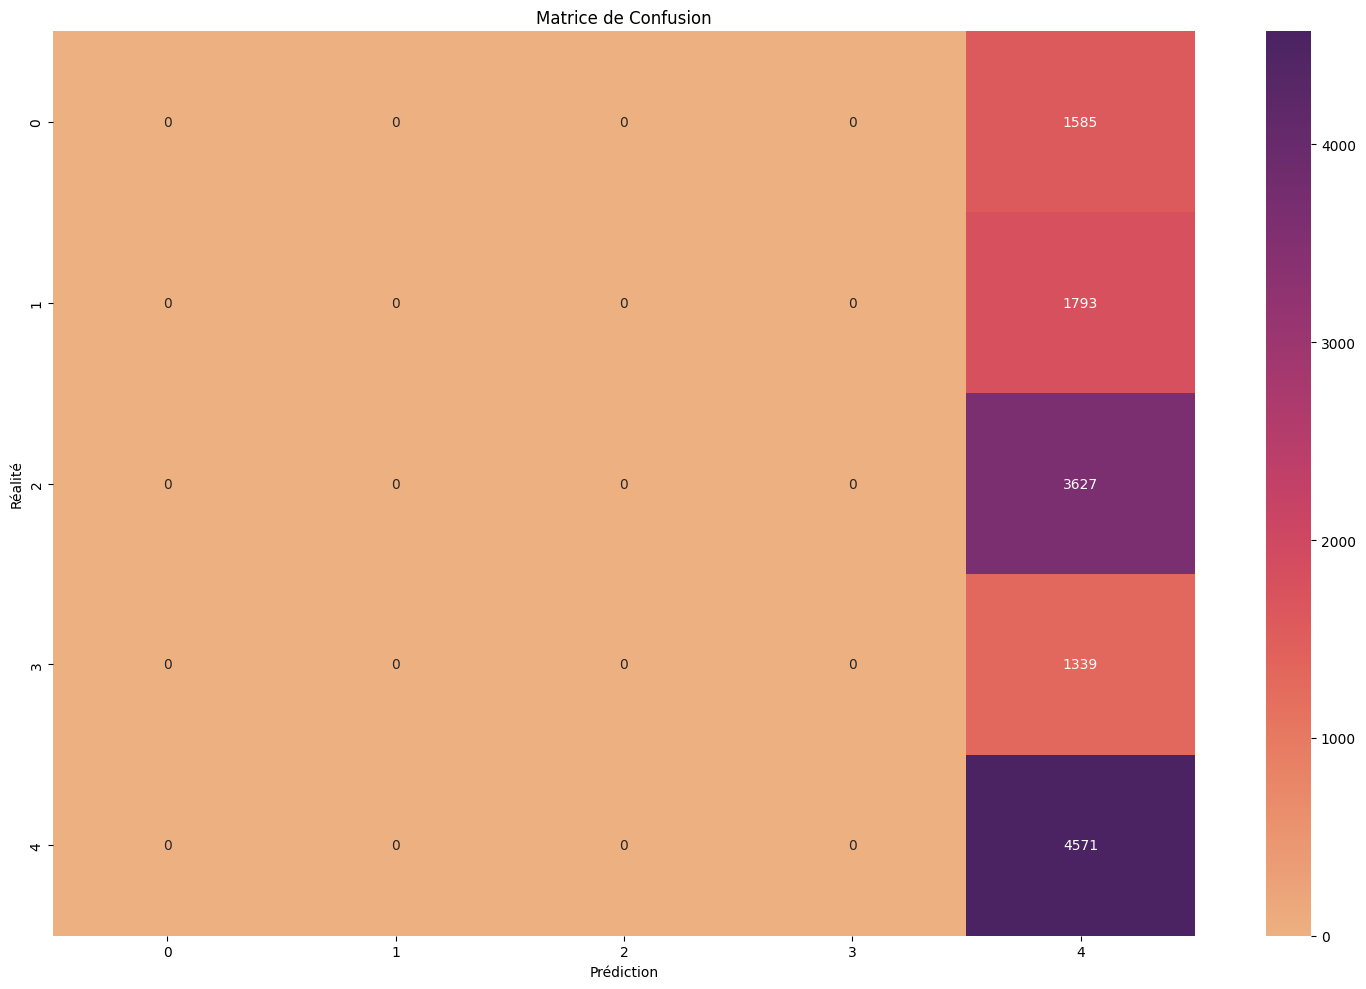

In [51]:
# Création du modèle --> 0.35 d'accuracy - 1 seconde

# En ajoutant des hyperparamètres (comme alpha), cela baissait
naive_bayes = MultinomialNB()

# On appelle notre fonction de classification
classification_data(naive_bayes, X_train, y_train, X_test, y_test, "Naïve Bayes")

4) **Perceptron**

In [52]:
from sklearn.linear_model import Perceptron

 🥁 Chargement ... 🥁
🎄 Résultat : Perceptron 🎄
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1585
           2       0.00      0.00      0.00      1793
           3       0.00      0.00      0.00      3627
           4       0.00      0.00      0.00      1339
           5       0.35      1.00      0.52      4571

    accuracy                           0.35     12915
   macro avg       0.07      0.20      0.10     12915
weighted avg       0.13      0.35      0.19     12915

Accuracy: 0.35392953929539295
🎨 Matrice de Confusion 🎨


/home/patricia/Desktop/universite/master_2/apprentissage_automatique/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/patricia/Desktop/universite/master_2/apprentissage_automatique/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/patricia/Desktop/universite/master_2/apprentissage_automatique/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predi

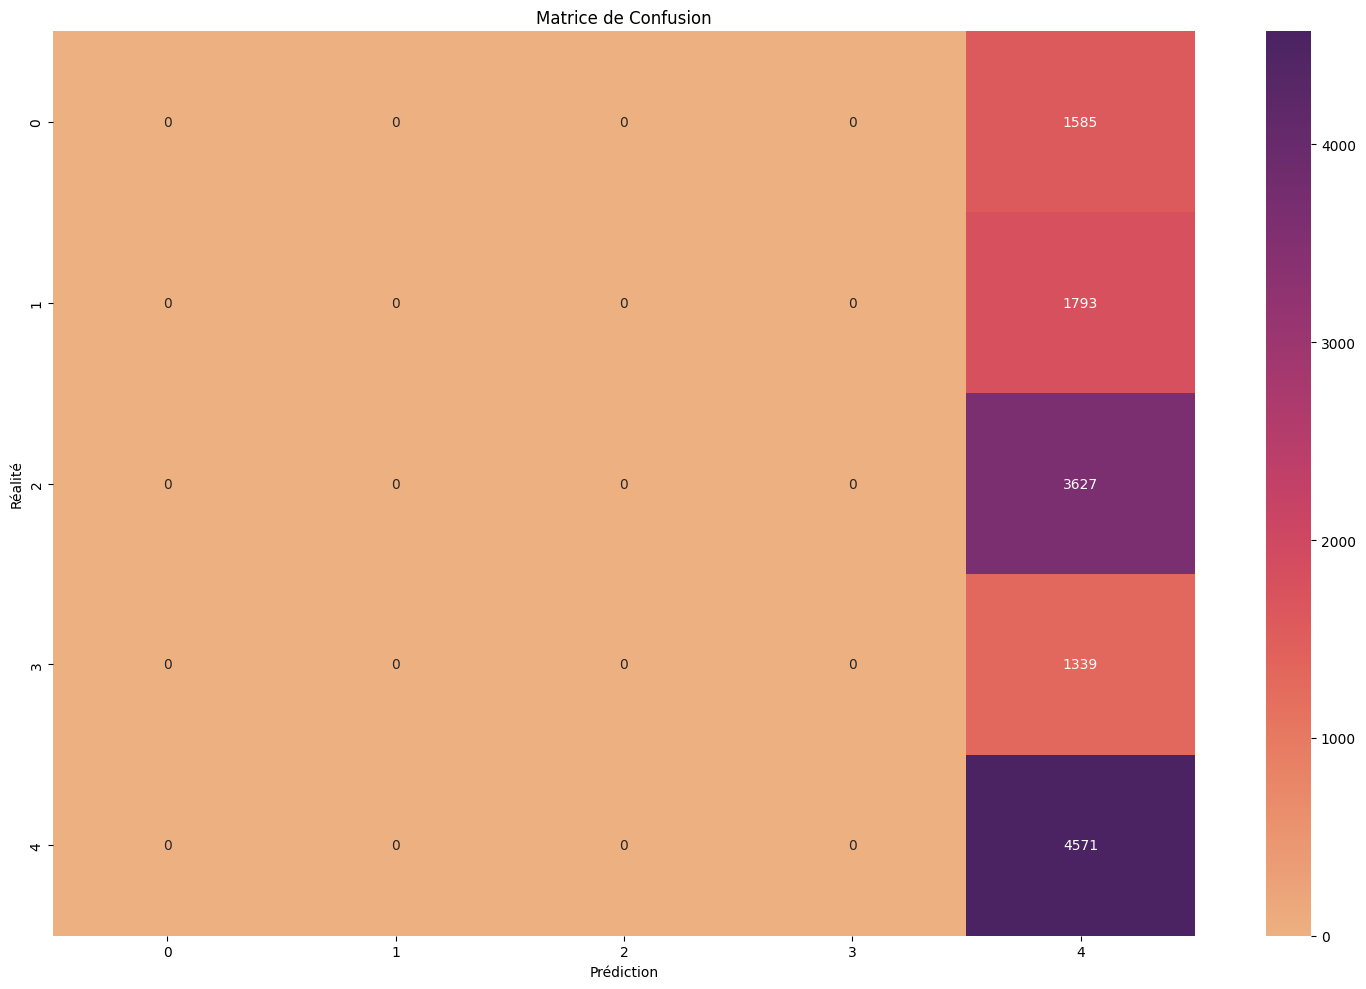

In [53]:
# Création du modèle --> 0.35 d'accuracy - 1 seconde

# L'augmentation de cet hyperparamètre améliore généralement les performances du modèle car il détermine le nombre maximal de passages sur les données d'entraînement (pour ajuster les poids du perceptron).
perceptron = Perceptron(max_iter=1000, random_state=42)

# On appelle notre fonction de classification
classification_data(perceptron, X_train, y_train, X_test, y_test, "Perceptron")

5) **Support Vector Machine**

In [54]:
from sklearn.svm import SVC

 🥁 Chargement ... 🥁
🎄 Résultat : Support Vector Machine 🎄
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1585
           2       0.00      0.00      0.00      1793
           3       0.00      0.00      0.00      3627
           4       0.00      0.00      0.00      1339
           5       0.35      1.00      0.52      4571

    accuracy                           0.35     12915
   macro avg       0.07      0.20      0.10     12915
weighted avg       0.13      0.35      0.19     12915

Accuracy: 0.35392953929539295
🎨 Matrice de Confusion 🎨


/home/patricia/Desktop/universite/master_2/apprentissage_automatique/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/patricia/Desktop/universite/master_2/apprentissage_automatique/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/patricia/Desktop/universite/master_2/apprentissage_automatique/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predi

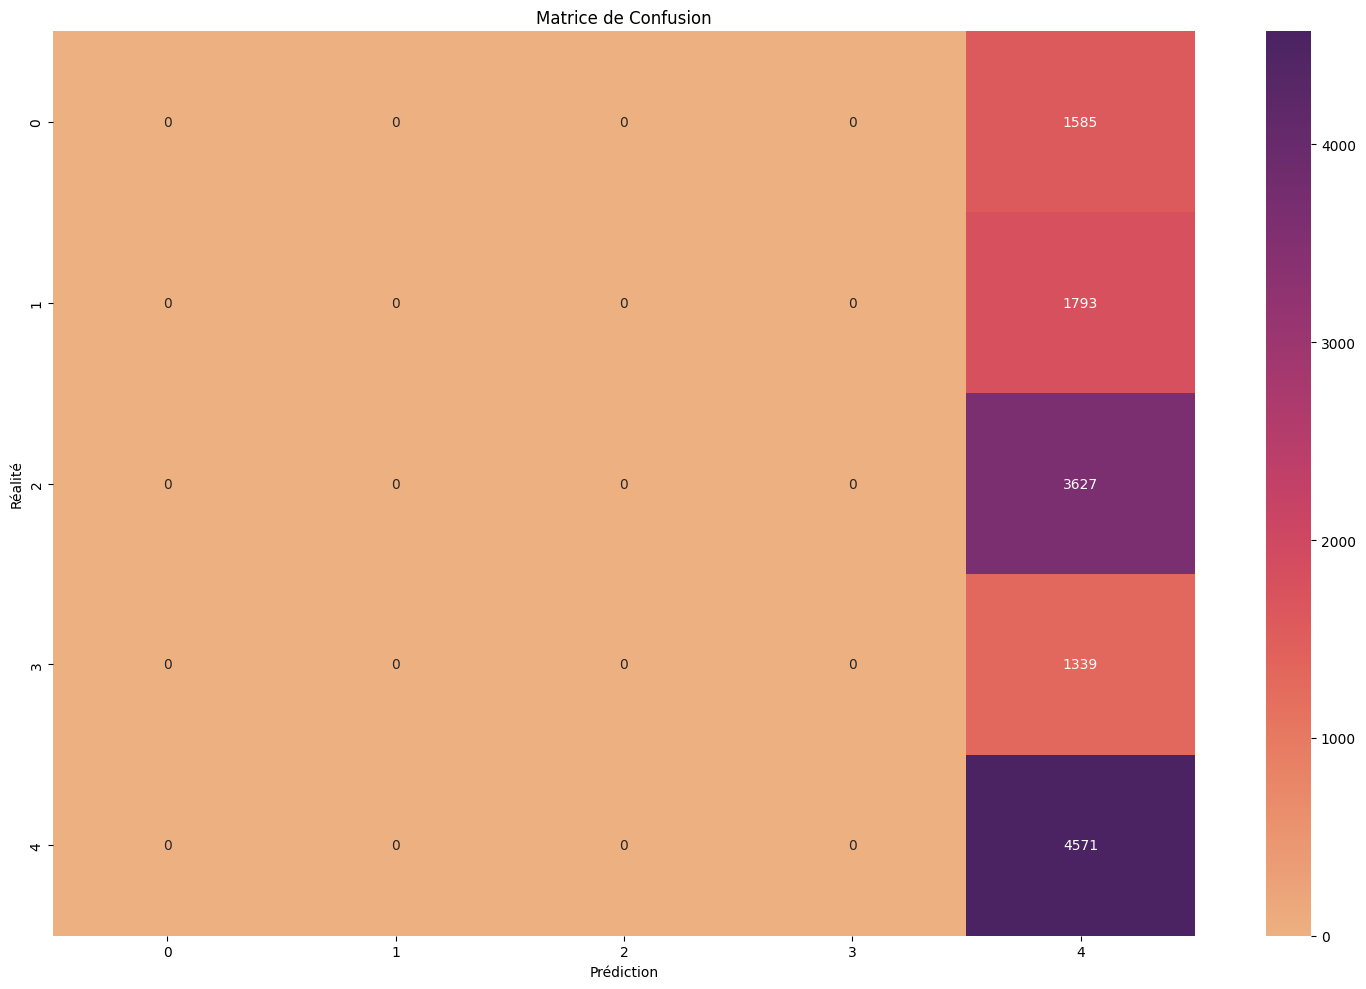

In [55]:
# Création du modèle --> 0.35 d'accuracy - 23 secondes 

# On fait une séparation linéaire pour le SVM afin que le modèle soit plus rapide
svm = SVC(kernel="linear", random_state=42)

# On appelle notre fonction de classification
classification_data(svm, X_train, y_train, X_test, y_test, "Support Vector Machine")


7) **Linear SVC**

In [56]:
from sklearn.svm import LinearSVC

 🥁 Chargement ... 🥁
🎄 Résultat : Linear SVC 🎄
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1585
           2       0.00      0.00      0.00      1793
           3       0.00      0.00      0.00      3627
           4       0.00      0.00      0.00      1339
           5       0.35      1.00      0.52      4571

    accuracy                           0.35     12915
   macro avg       0.07      0.20      0.10     12915
weighted avg       0.13      0.35      0.19     12915

Accuracy: 0.35392953929539295
🎨 Matrice de Confusion 🎨


/home/patricia/Desktop/universite/master_2/apprentissage_automatique/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/patricia/Desktop/universite/master_2/apprentissage_automatique/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/patricia/Desktop/universite/master_2/apprentissage_automatique/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predi

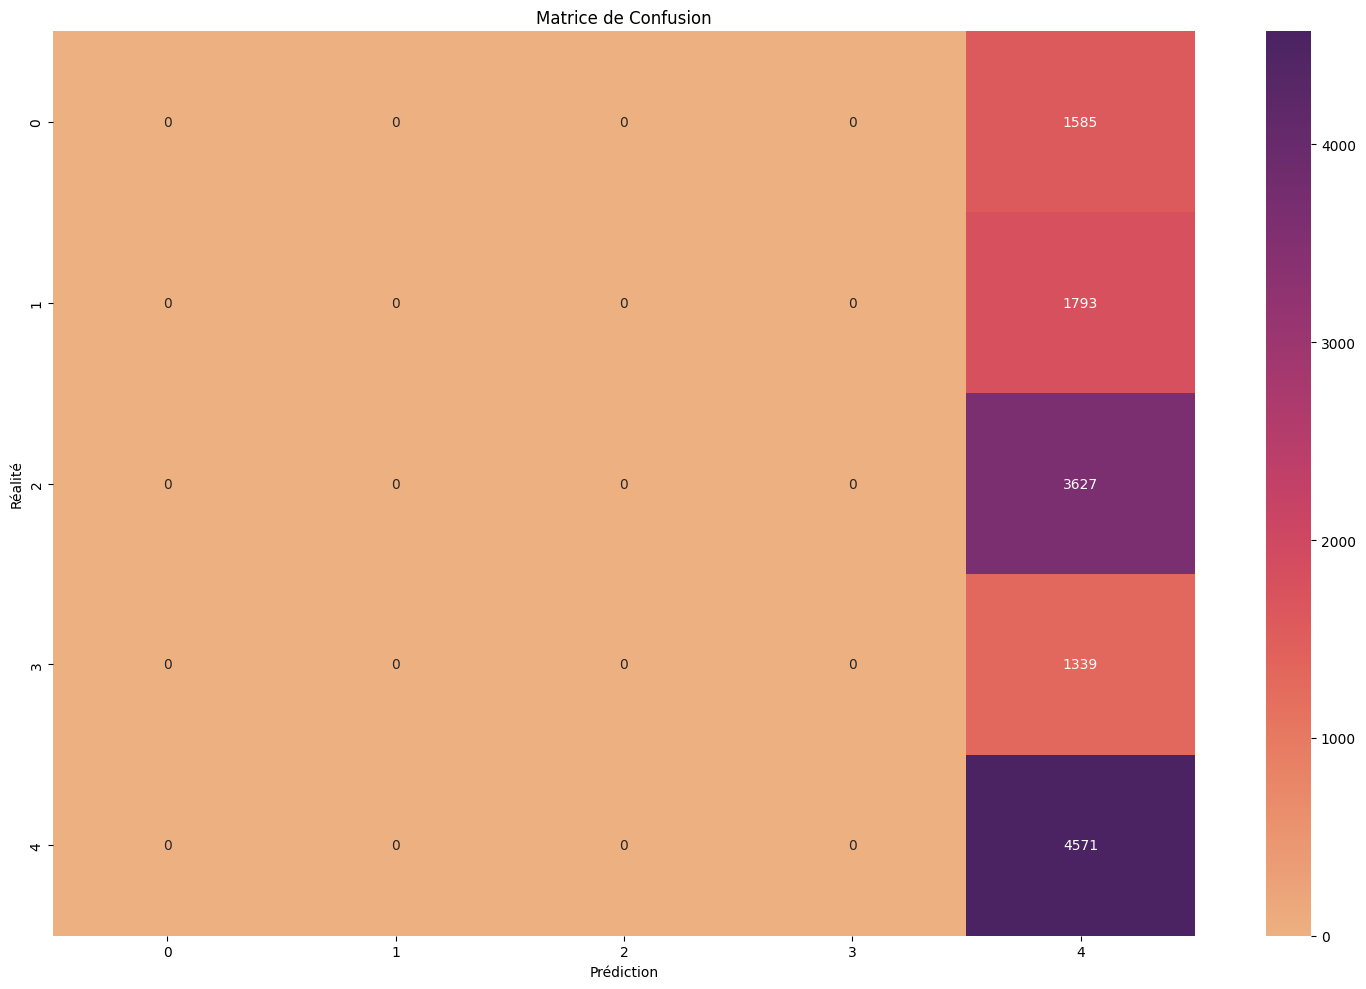

In [57]:

# Création du modèle --> 0.35 d'accuracy - 1 secondes 

svc = LinearSVC()

classification_data(svc, X_train, y_train, X_test, y_test, "Linear SVC")

7) **Régression de logistique**

In [58]:
from sklearn.linear_model import LogisticRegression 

 🥁 Chargement ... 🥁
🎄 Résultat : Régression Logistique 🎄
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1585
           2       0.00      0.00      0.00      1793
           3       0.00      0.00      0.00      3627
           4       0.00      0.00      0.00      1339
           5       0.35      1.00      0.52      4571

    accuracy                           0.35     12915
   macro avg       0.07      0.20      0.10     12915
weighted avg       0.13      0.35      0.19     12915

Accuracy: 0.35392953929539295
🎨 Matrice de Confusion 🎨


/home/patricia/Desktop/universite/master_2/apprentissage_automatique/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/patricia/Desktop/universite/master_2/apprentissage_automatique/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/patricia/Desktop/universite/master_2/apprentissage_automatique/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predi

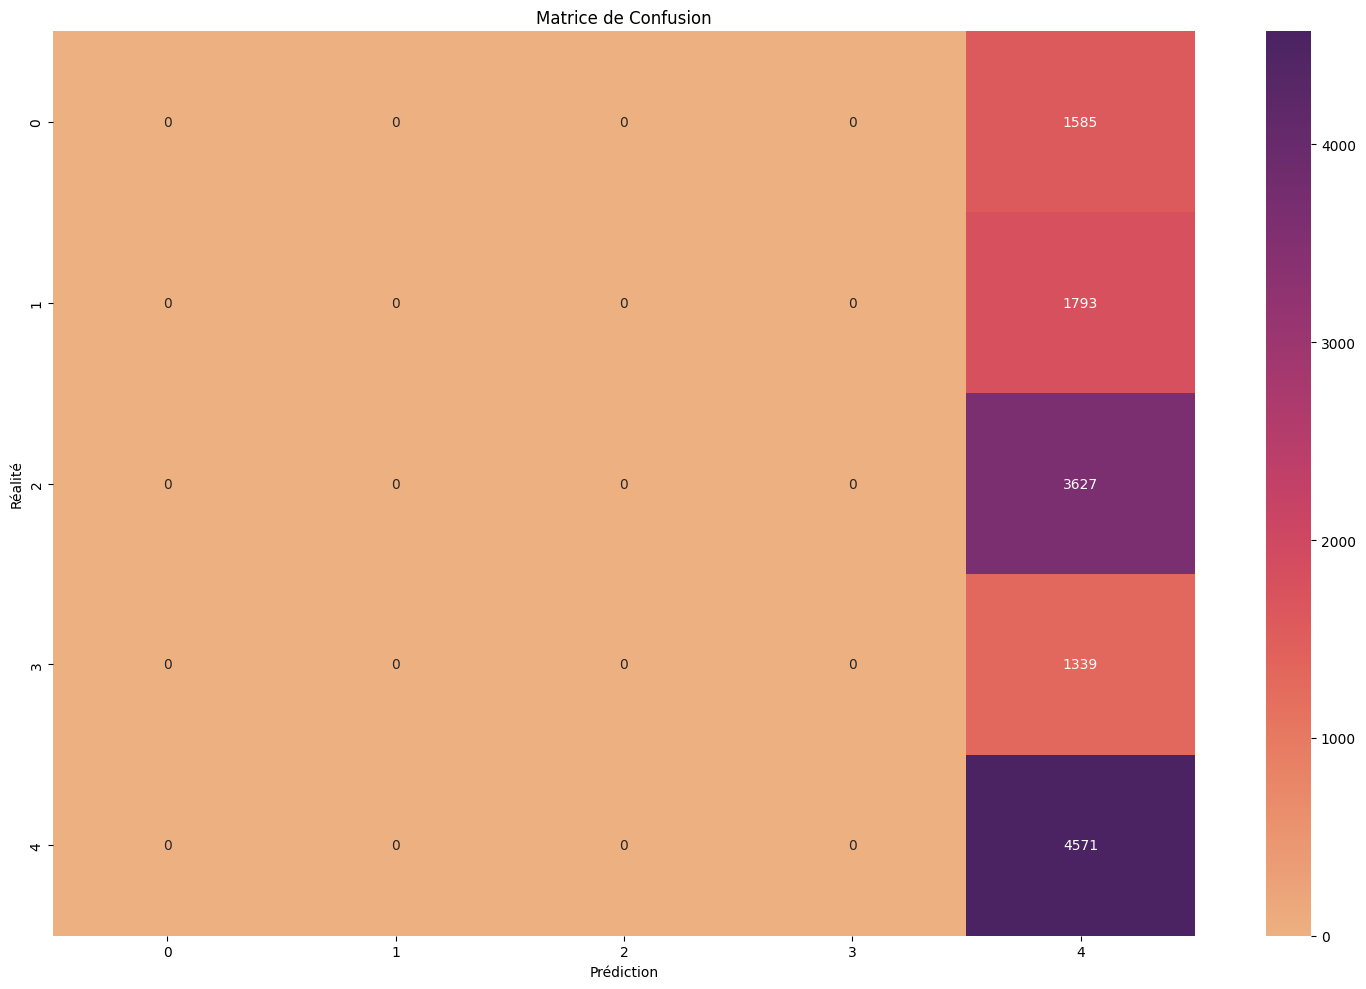

In [59]:
# Création du modèle --> 0.35 d'accuracy - 1 seconde
log_reg = LogisticRegression()

# On appelle notre fonction de classification
classification_data(log_reg, X_train, y_train, X_test, y_test, "Régression Logistique")

8) **Complement NB**

In [60]:
from sklearn.naive_bayes import ComplementNB

 🥁 Chargement ... 🥁
🎄 Résultat : Complement Naive Bayes 🎄
              precision    recall  f1-score   support

           1       0.12      0.15      0.13      1585
           2       0.14      0.06      0.08      1793
           3       0.28      0.41      0.33      3627
           4       0.11      0.09      0.10      1339
           5       0.36      0.30      0.33      4571

    accuracy                           0.26     12915
   macro avg       0.20      0.20      0.19     12915
weighted avg       0.25      0.26      0.25     12915

Accuracy: 0.256833139759969
🎨 Matrice de Confusion 🎨


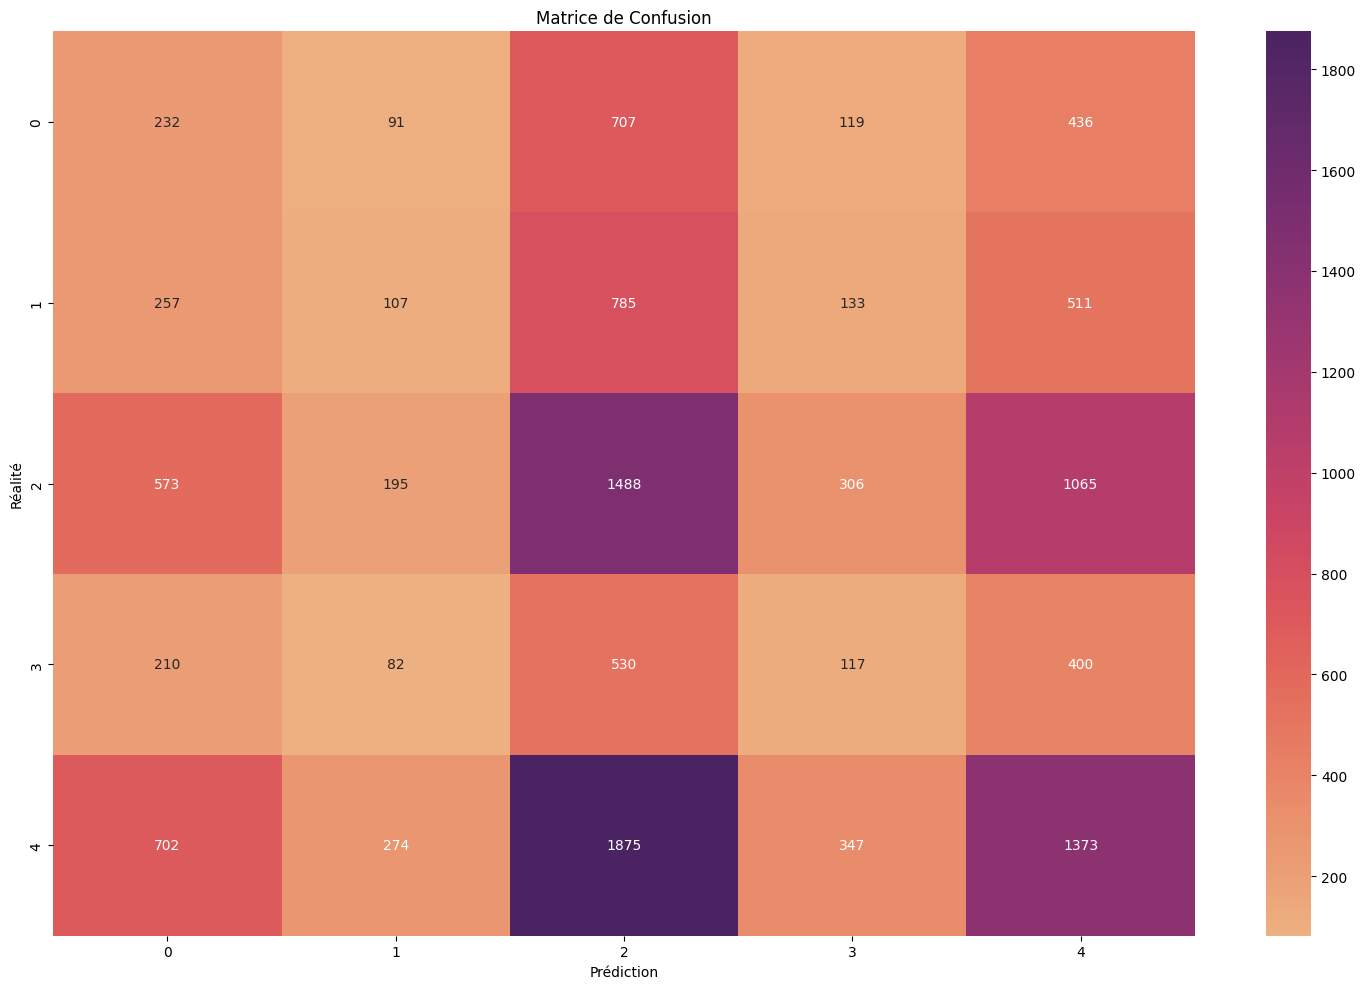

In [61]:
# Création du modèle --> 0.25 d'accuracy - 1 seconde

complemet_nb = ComplementNB()
classification_data(complemet_nb, X_train, y_train, X_test, y_test, "Complement Naive Bayes")

______________________________________________________________________________

Voici un tableau récapitulatif de tous les scores obtenus, qui permet de comparer les performances des différents algorithmes de classification utilisés dans ce projet. :

| Algorithmes              | Standard   | 
| :----------------------: |  :-------: |
| Arbre de décision        |    0,24    |
| Random Forest            |    0,32    |
| Naïve Bayes              |    0,35   |
| Perceptron               |    0,35   | 
| Support Vector Machine   |    0,35    | 
| Linear SVC              |    0,35    |
| Régression de logistique |    0,35   | 
| **Complement NB** |    0,25  |   

______________________________________________________________________________
